In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard
 
# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
 
print(tf.__version__)

2.3.0


In [ ]:

# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [ ]:
# unzipping the contents
!unzip animal_data/train_beg.zip
!unzip animal_data/test_beg.zip


Archive:  animal_data/train_beg.zip
replace train_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  animal_data/test_beg.zip
replace test_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# accessing the given csv file for training
import pandas as pd
train_labels_csv = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
train_labels_csv.head()   # this file contains file name and corresponding labels
# accessing the given csv file for testing
import pandas as pd
test_labels_csv = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv')
test_labels_csv.columns = ['filename']
test_labels_csv.head()   # this file contains file name and corresponding labels

,filename
0,Image_2.jpg
1,Image_3.jpg
2,Image_4.jpg
3,Image_5.jpg
4,Image_6.jpg


In [ ]:

train_image_paths = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in train_labels_csv['filename']]
test_image_paths = [[fname, '/content/test_beg/' + fname[:-4] + '.jpg'] for fname in test_labels_csv['filename']]


In [ ]:

#Creating a dataframe for to access train images
train_images = pd.DataFrame(train_image_paths)
train_images.columns = ['filename', 'file']
train_images.head()

,filename,file
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg


In [ ]:
#Creating a dataframe for to access train images
testt_images = pd.DataFrame(test_image_paths)
testt_images.columns = ['filename', 'file']
testt_images.head()

,filename,file
0,Image_2.jpg,/content/test_beg/Image_2.jpg
1,Image_3.jpg,/content/test_beg/Image_3.jpg
2,Image_4.jpg,/content/test_beg/Image_4.jpg
3,Image_5.jpg,/content/test_beg/Image_5.jpg
4,Image_6.jpg,/content/test_beg/Image_6.jpg


In [ ]:
train_data = pd.merge(train_images, train_labels_csv, how = 'inner', on = 'filename')

for i in range(1199):
  if train_data.iloc[i,2] !=train_data.iloc[i+1,2]:
    print(train_data.iloc[i,2],train_data.iloc[i+1,2])
train_data.head()

mucca pecora


,filename,file,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


In [ ]:
#creating a class to get indices.
class_names = ['mucca','pecora']


In [ ]:
import cv2


In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

In [ ]:
#preparing data for training
data = []
lbel=[]
IMG_SIZE=244
for i in range(1001):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
  img=cv2.imread(train_data.iloc[i,1],0)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
  data.append(np.array(img))
  lbel.append(class_names.index(train_data.iloc[i,2])) #  append the image array and the label of each file into data
#preparing data for evaluation
y_data=[]
y_lbel=[]
for j in range(1001,1200):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
  img=cv2.imread(train_data.iloc[j,1],0)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
  y_data.append(np.array(img))
  y_lbel.append(class_names.index(train_data.iloc[j,2])) #  append the image array and the label of each file into data


In [ ]:
#preparing final testing data
tdata = []
IMG_SIZE=244
for i in range(len(testt_images)):
  # read the file using OpenCV's imread function and store it in a variable 'img_array'
   img=cv2.imread(testt_images.iloc[i,1],0)
   if type(img) is np.ndarray:
        
        if img.size == 0:
          
          continue
        if img is None:
          print("1")
          continue
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        tdata.append(np.array(img)) #  append the image array and the label of each file into datadimensionnement de l'image


In [ ]:
lbel=np.array(lbel)
type(lbel)
lbel.shape

(1001,)

In [ ]:
tdata[0].shape


(244, 244)

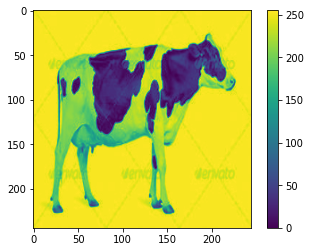

In [ ]:

#check the range of pixel values
plt.figure()

plt.imshow(data[9])

plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
data=np.array(data)
y_data=np.array(y_data)
data=data/255.0
y_data=y_data/255.0
data[1]
y_data.shape

(199, 244, 244)

In [ ]:
tdata=np.array(tdata)
tdata=tdata/255.0

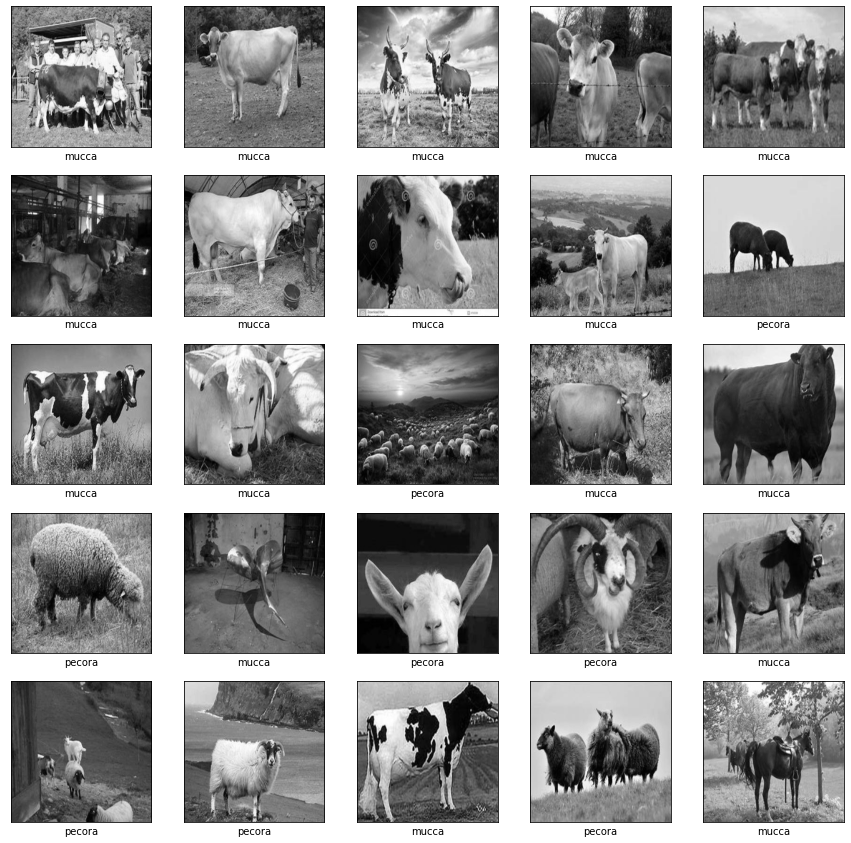

In [ ]:
#Lets visulaize training data
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,1000)     
  plt.imshow(data[rand_no], cmap='gray')
  plt.xlabel(class_names[lbel[rand_no]])

In [ ]:
# Clear any logs from previous runs
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(224,224)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)    # 0.001 is the learning rate

In [ ]:
def create_model():
  model=Sequential()
  #input layer size is 244*244 after flattening
  model.add(Flatten(input_shape=(244,244)))
  #hidden layer with 400 neurons
  model.add(Dense(512,activation='relu'))
  model.add(Dense(2,activation='sigmoid'))
  return model

In [ ]:

opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model=create_model()
model.summary()
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)
earlystopping_callback=EarlyStopping(
    monitor='val_loss',min_delta=0,patience=3,verbose=0,mode='auto',
    baseline=None,restore_best_weights=True
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 59536)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               30482944  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 30,483,970
Trainable params: 30,483,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    x=data,
    y=lbel,
    epochs=10,
    validation_split=0.0
)

Epoch 1/10
32/32 [==============================] - 4s 135ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 2/10
32/32 [==============================] - 4s 135ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 3/10
32/32 [==============================] - 4s 136ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 4/10
32/32 [==============================] - 4s 135ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 5/10
32/32 [==============================] - 4s 134ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 6/10
32/32 [==============================] - 4s 135ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 7/10
32/32 [==============================] - 4s 135ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 8/10
32/32 [==============================] - 4s 136ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 9/10
32/32 [==============================] - 4s 134ms/step - loss: 0.6931 - accuracy: 0.5994
Epoch 10/10
32/32 [==============================] - 4s 136ms/step - loss: 0.6929 - accuracy: 0.5994

In [ ]:
y_lbel=np.array(y_lbel)

In [ ]:
x=model.predict(tdata)

In [ ]:
x

array([[1.        , 0.99991924],
       [1.        , 0.9991945 ],
       [1.        , 0.9991032 ],
       [1.        , 0.99789244],
       [1.        , 0.9986974 ],
       [1.        , 0.9786347 ],
       [1.        , 0.99894655],
       [1.        , 0.77173865],
       [1.        , 0.9996431 ],
       [1.        , 0.99966466],
       [1.        , 0.9992361 ],
       [1.        , 0.9996487 ],
       [1.        , 0.98129326],
       [1.        , 0.99841994],
       [1.        , 0.9989108 ],
       [1.        , 0.9999124 ],
       [1.        , 0.9986104 ],
       [1.        , 0.99973553],
       [1.        , 0.9995529 ],
       [1.        , 0.9977521 ],
       [1.        , 0.99995667],
       [1.        , 0.9991044 ],
       [1.        , 0.9952477 ],
       [1.        , 0.99299777],
       [1.        , 0.9984426 ],
       [1.        , 0.9977131 ],
       [1.        , 0.98435235],
       [1.        , 0.9999294 ],
       [1.        , 0.999874  ],
       [1.        , 0.9999821 ],
       [1.

In [ ]:
test_loss, test_acc = model.evaluate(y_data,  y_lbel, verbose=2)

7/7 - 0s - loss: 0.6943 - accuracy: 0.0000e+00


In [ ]:
np.argmax(x[2])

0

In [ ]:
class_names[np.argmax(x[388])]

'mucca'

In [ ]:
np.argmax(x[2])

0

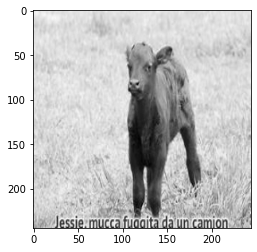

In [ ]:
plt.imshow(tdata[189],cmap='gray')

In [ ]:
p=[]
for i in range(399):
  p.append(class_names[np.argmax(x[i])])

In [ ]:
print(p)

['mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 'mucca', 

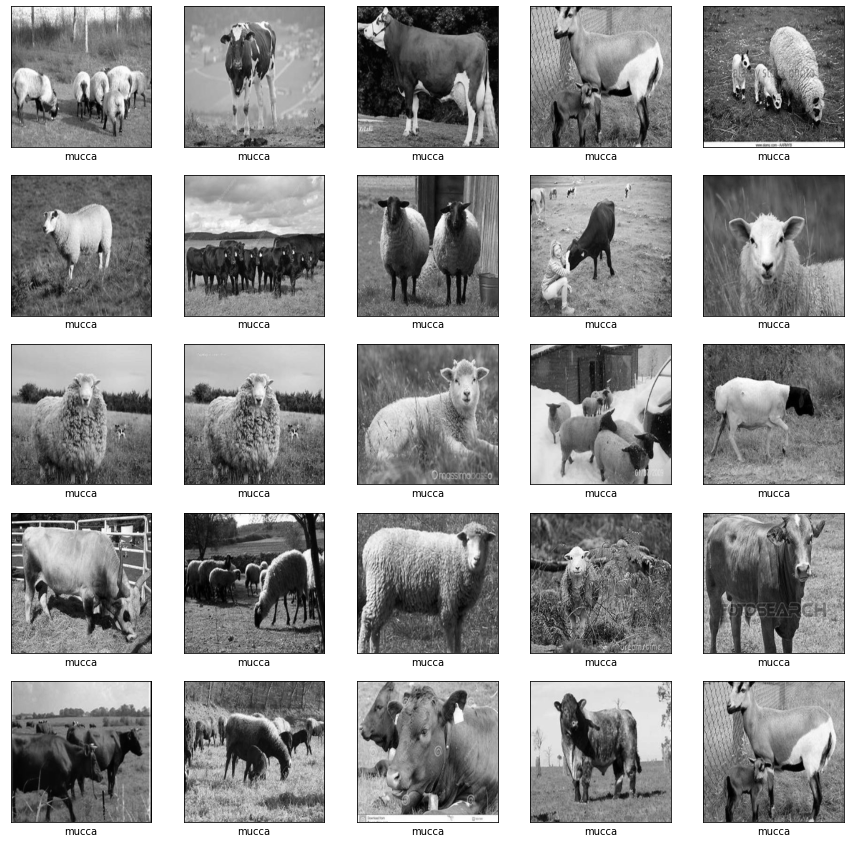

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(testt_images))     
  plt.imshow(tdata[rand_no], cmap='gray')
  plt.xlabel(class_names[np.argmax(x[rand_no])])